In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load the dataset
file_path_fd001 = 'C:\\Users\\Vibha\\AI-Predictive-Maintenance\\data\\train_FD001.txt'
data_fd001 = pd.read_csv(file_path_fd001, sep=' ', header=None)

# Drop empty columns and assign column names
data_fd001 = data_fd001.dropna(axis=1)
columns = ['unit_number', 'cycle'] + [f'setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
data_fd001.columns = columns

# Display the first few rows
print(data_fd001.head())


   unit_number  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0            1      1    -0.0007    -0.0004      100.0    518.67    641.82   
1            1      2     0.0019    -0.0003      100.0    518.67    642.15   
2            1      3    -0.0043     0.0003      100.0    518.67    642.35   
3            1      4     0.0007     0.0000      100.0    518.67    642.35   
4            1      5    -0.0019    -0.0002      100.0    518.67    642.37   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1   1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2   1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3   1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4   1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     8.419

In [3]:
# Check basic information about the dataset
data_fd001.info()
# Display summary statistics of the numerical columns
data_fd001.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   sensor_1     20631 non-null  float64
 6   sensor_2     20631 non-null  float64
 7   sensor_3     20631 non-null  float64
 8   sensor_4     20631 non-null  float64
 9   sensor_5     20631 non-null  float64
 10  sensor_6     20631 non-null  float64
 11  sensor_7     20631 non-null  float64
 12  sensor_8     20631 non-null  float64
 13  sensor_9     20631 non-null  float64
 14  sensor_10    20631 non-null  float64
 15  sensor_11    20631 non-null  float64
 16  sensor_12    20631 non-null  float64
 17  sensor_13    20631 non-null  float64
 18  sensor_14    20631 non-null  float64
 19  sens

,unit_number,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [4]:
# Check for missing values in each column
missing_data = data_fd001.isnull().sum()
print(f'Missing values in each column:\n{missing_data}')

Missing values in each column:
unit_number    0
cycle          0
setting_1      0
setting_2      0
setting_3      0
sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
dtype: int64


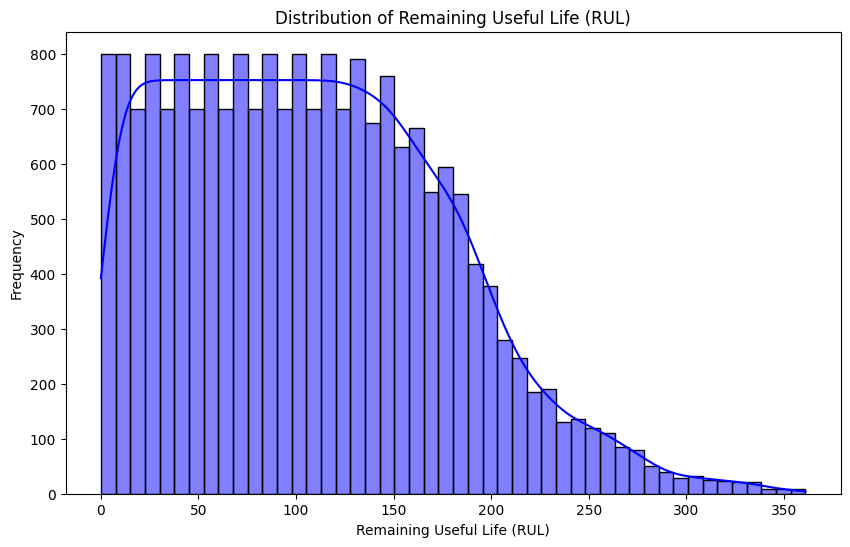

In [5]:
# Calculate RUL (Remaining Useful Life)
max_cycle = data_fd001.groupby('unit_number')['cycle'].max()
data_fd001['RUL'] = data_fd001['unit_number'].map(max_cycle) - data_fd001['cycle']

# Plot the distribution of RUL
plt.figure(figsize=(10, 6))
sns.histplot(data_fd001['RUL'], kde=True, color='blue')
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Frequency')
plt.show()


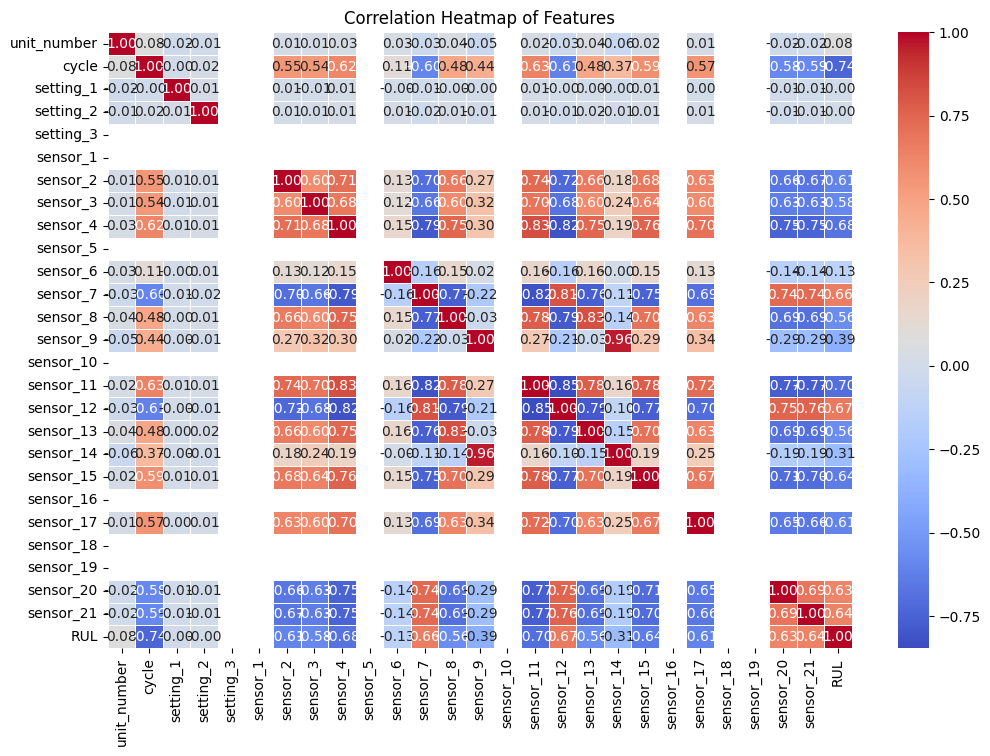

In [6]:
# Correlation matrix for sensor features
correlation_matrix = data_fd001.corr()

# Plot heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


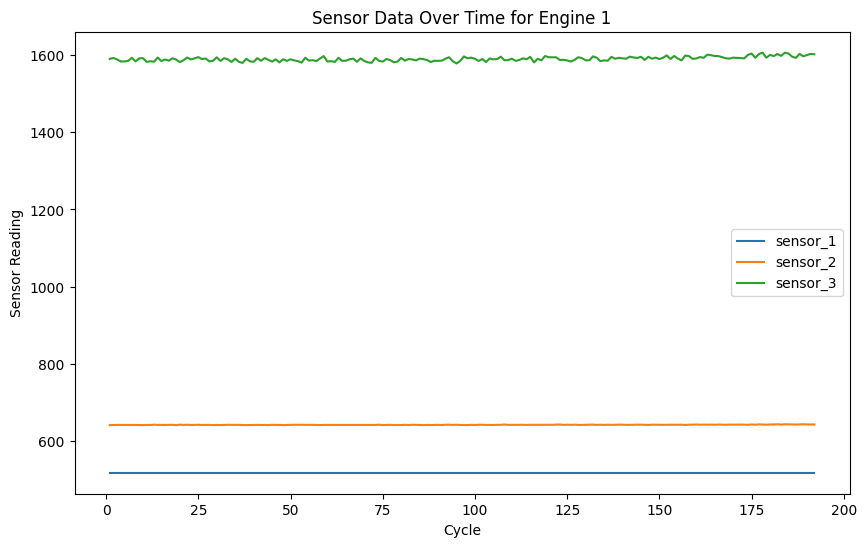

In [7]:
# Select data for a specific engine/unit (e.g., engine 1)
engine_1_data = data_fd001[data_fd001['unit_number'] == 1]

# Plot sensor data over time
plt.figure(figsize=(10, 6))
for sensor in ['sensor_1', 'sensor_2', 'sensor_3']:
    plt.plot(engine_1_data['cycle'], engine_1_data[sensor], label=sensor)
plt.title('Sensor Data Over Time for Engine 1')
plt.xlabel('Cycle')
plt.ylabel('Sensor Reading')
plt.legend()
plt.show()


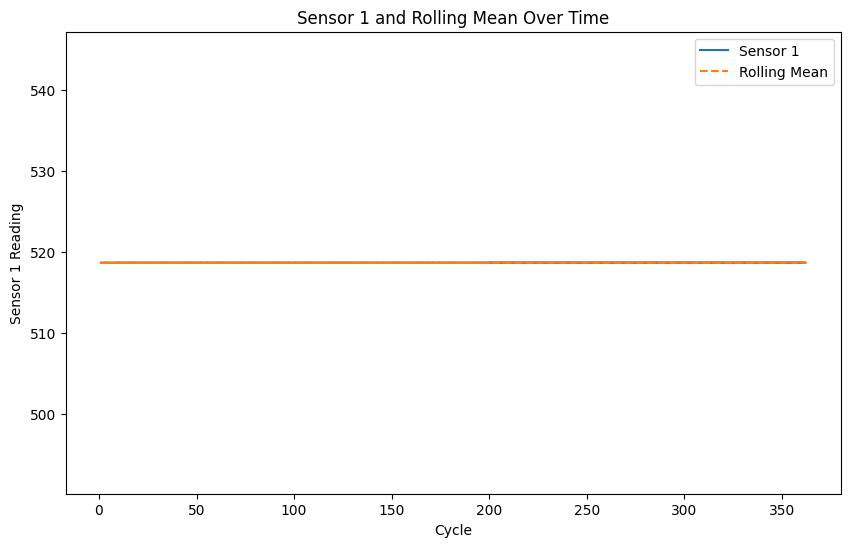

In [8]:
# Calculate rolling mean for a sensor (e.g., sensor_1)
data_fd001['sensor_1_rolling_mean'] = data_fd001['sensor_1'].rolling(window=10).mean()

# Plot the rolling mean along with the sensor data
plt.figure(figsize=(10, 6))
plt.plot(data_fd001['cycle'], data_fd001['sensor_1'], label='Sensor 1')
plt.plot(data_fd001['cycle'], data_fd001['sensor_1_rolling_mean'], label='Rolling Mean', linestyle='--')
plt.title('Sensor 1 and Rolling Mean Over Time')
plt.xlabel('Cycle')
plt.ylabel('Sensor 1 Reading')
plt.legend()
plt.show()


In [9]:
import os

file_path = 'C:/Users/Vibha/AI-Predictive-Maintenance/data/train_FD001.csv'

# Check if the file exists
if os.path.exists(file_path):
    data_fd001 = pd.read_csv(file_path)
    print("File loaded successfully")
else:
    print(f"File not found: {file_path}")


File not found: C:/Users/Vibha/AI-Predictive-Maintenance/data/train_FD001.csv


In [10]:
# Save the preprocessed data
data_fd001.to_csv('C:/Users/Vibha/AI-Predictive-Maintenance/data/processed_train_FD001.csv', index=False)
print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!
